In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

In [3]:
train=pd.DataFrame(pd.read_csv(r'Trainfile.csv'))
test=pd.DataFrame(pd.read_csv(r'Testfile.csv'))
pd.set_option('display.max_columns', None)
train.drop(columns=['Idx'],inplace=True)
test.drop(columns=['Idx'],inplace=True)

In [6]:
train[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,45,RL,59.0,7227,Pave,NaN,Reg,HLS,AllPub,Corner,Mod,NAmes,Artery,Norm,1Fam,1.5Unf,6,6,1954,1954,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Gd,Y,SBrkr,832,0,0,832,0,0,1,0,2,1,Gd,4,Typ,0,NaN,Detchd,1962.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,105500
1,60,RL,NaN,12227,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,7,1977,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,424.0,TA,Gd,CBlock,Gd,Gd,No,ALQ,896,Unf,0,434,1330,GasA,TA,Y,SBrkr,1542,1330,0,2872,1,0,2,1,4,1,TA,11,Typ,1,TA,Attchd,1977.0,Fin,2,619,TA,TA,Y,550,282,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,272000
2,20,RL,65.0,7800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1967,2004,Hip,CompShg,HdBoard,HdBoard,BrkFace,89.0,TA,TA,PConc,TA,TA,No,ALQ,450,Unf,0,414,864,GasA,Ex,Y,SBrkr,899,0,0,899,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1967.0,Fin,1,288,TA,TA,Y,64,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,130000
3,60,RL,88.0,12665,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,245.0,Gd,TA,PConc,Gd,Gd,Gd,Unf,0,Unf,0,1094,1094,GasA,Ex,Y,SBrkr,1133,1349,0,2482,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,Fin,3,642,TA,TA,Y,144,39,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,281213
4,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


In [226]:
train['MSZoning'].describe()

count     1138
unique       5
top         RL
freq       906
Name: MSZoning, dtype: object

In [220]:
encode(train['MSZoning']).value_counts()

4    906
3    167
2     44
1     12
0      9
Name: MSZoning, dtype: int64

In [7]:
def nan_handling(df):
    df['LotFrontage']=df.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))
    df['Utilities'].fillna(train['Utilities'].mode(),inplace=True)
    df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0],inplace=True)
    df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)
    df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
    return df

In [8]:
train=nan_handling(train)
test=nan_handling(test)

In [172]:
def normalize(ser):
    if ser.max()-ser.min()==0.0: return ser*1.0
    norm_ser=(ser-ser.min())/(ser.max()-ser.min())
    return norm_ser

In [29]:
def encode(ser):
    decode=ser.value_counts().index.tolist()[::-1]
    if (ser.isna()).mean()>0.0:
        decode=[np.nan]+decode
    encoded_ser=ser.replace({v:i for i,v in enumerate(decode)})
    return encoded_ser

In [227]:
def fix_data(df_orig):
    df=df_orig.copy(deep=True)
    #removing nan in non categorical attributes
    df['LotFrontage'].fillna(0,inplace=True)
    df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)
    for i in df.columns.tolist():
        if df[i].dtype==object:
            df[i]=encode(df[i])
        df[i]=normalize(df[i])
    return df    

In [228]:
Y_df=train['SalePrice']/1000000
X_df=train.drop(columns=['SalePrice'])
X_train=fix_data(X_df).values.T
Y_train=Y_df.values.reshape((1,X_train.shape[1]))

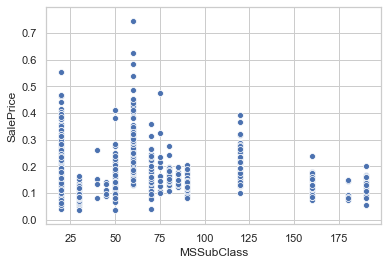

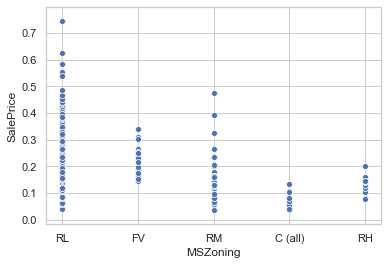

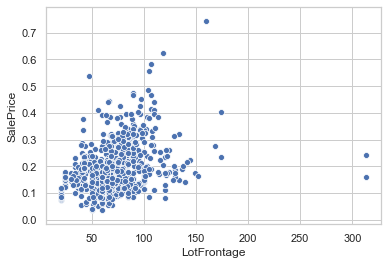

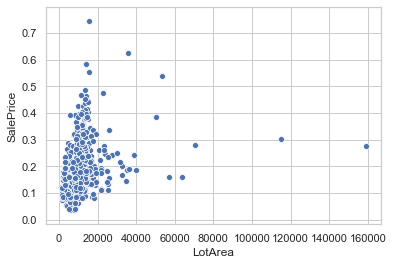

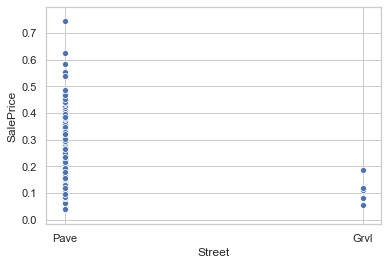

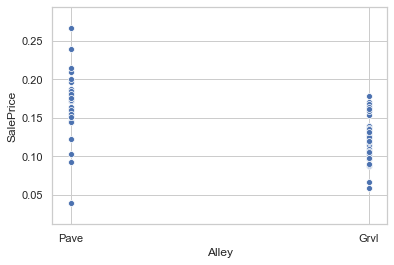

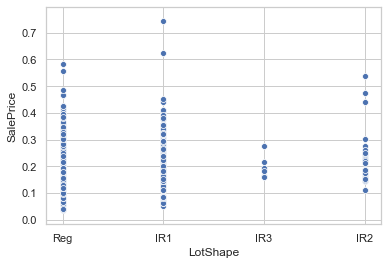

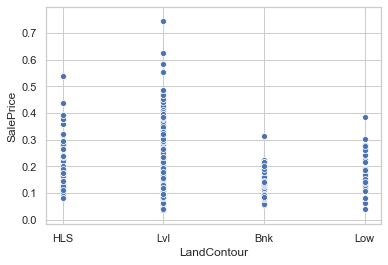

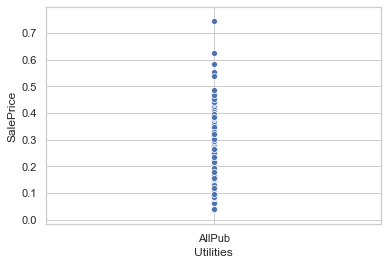

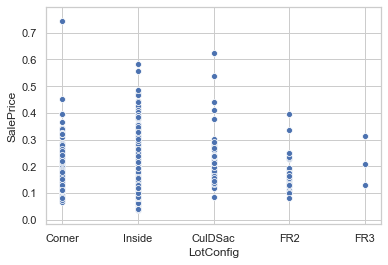

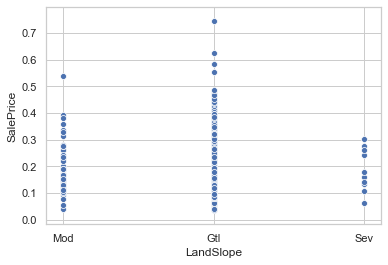

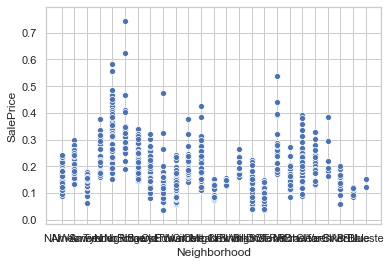

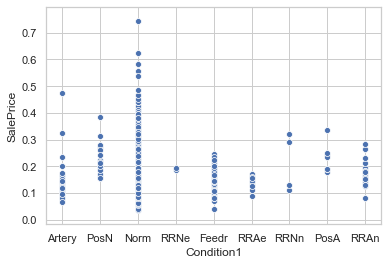

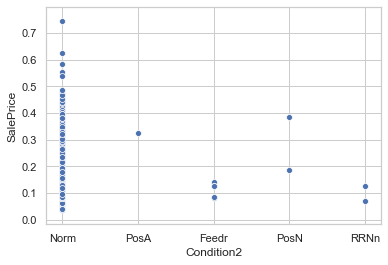

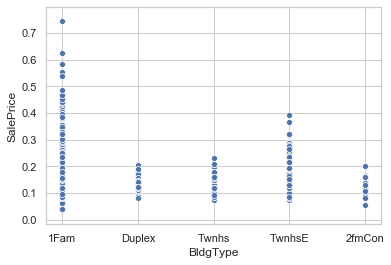

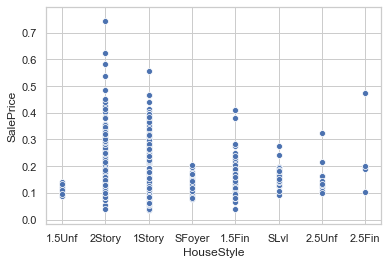

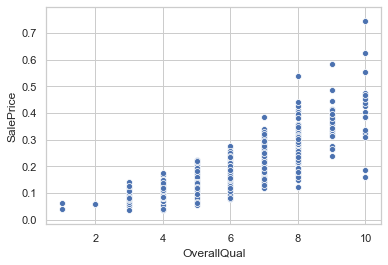

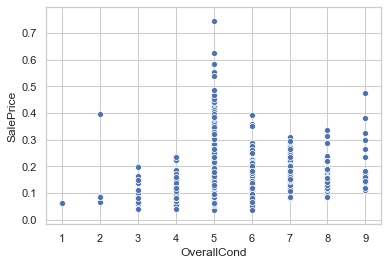

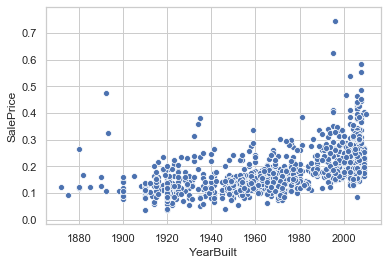

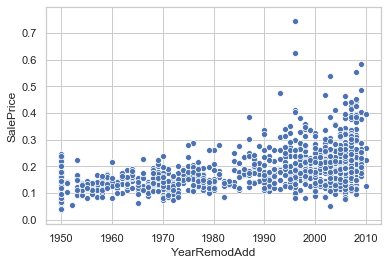

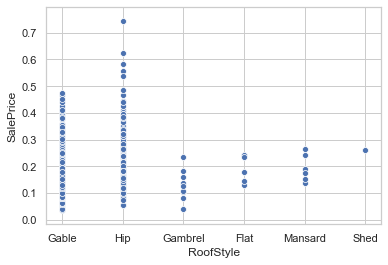

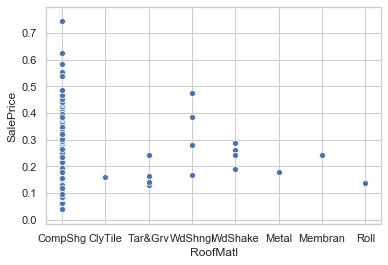

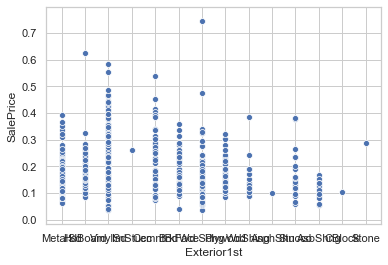

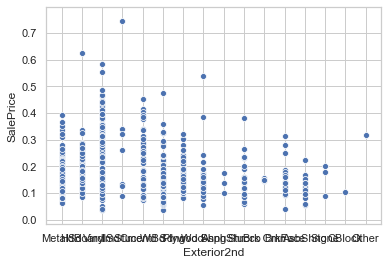

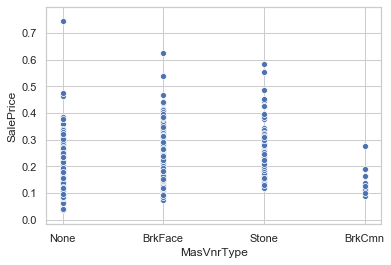

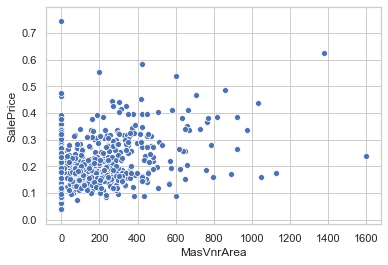

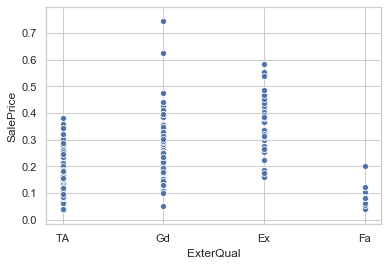

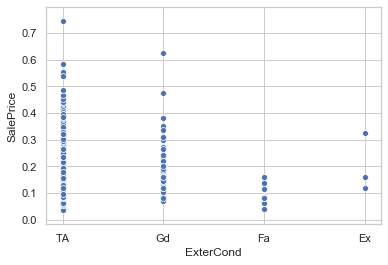

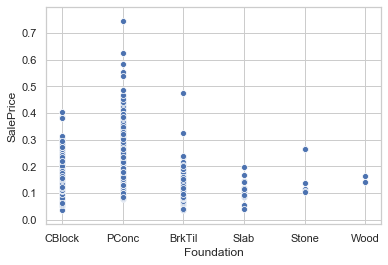

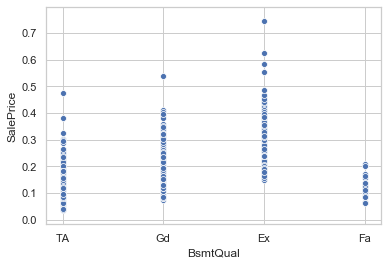

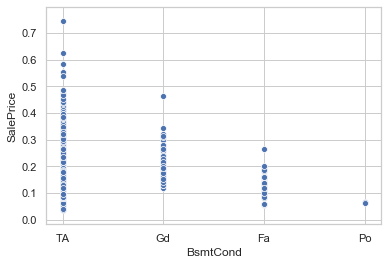

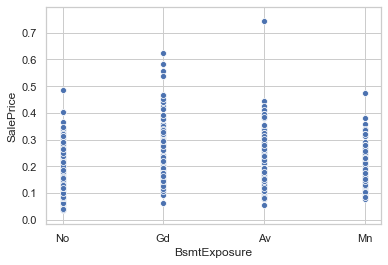

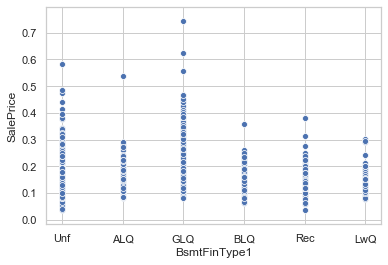

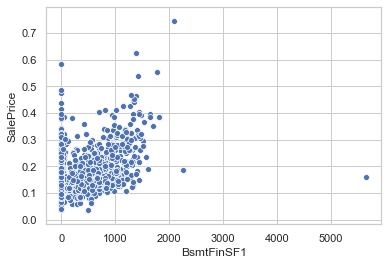

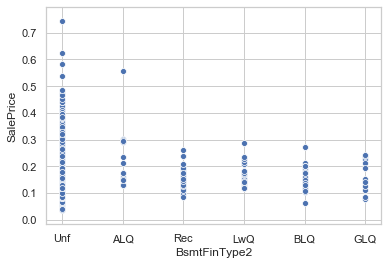

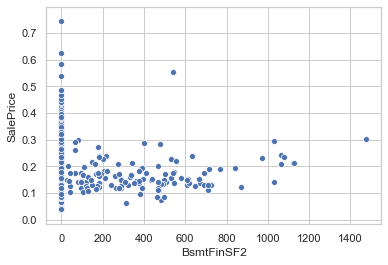

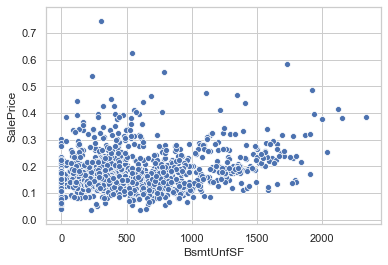

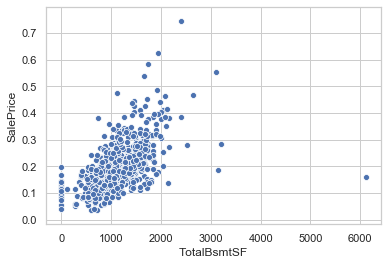

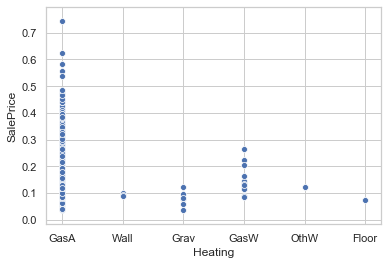

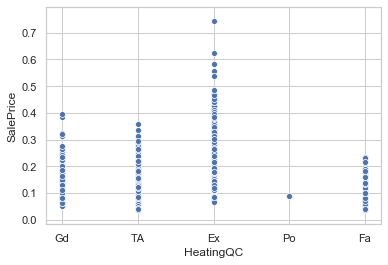

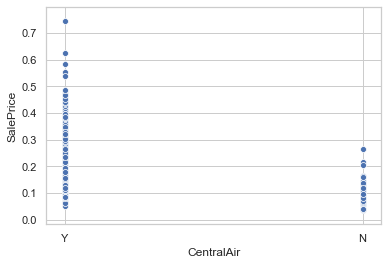

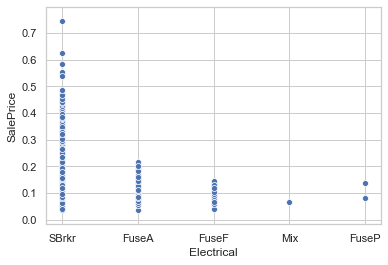

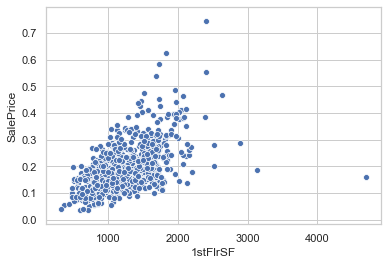

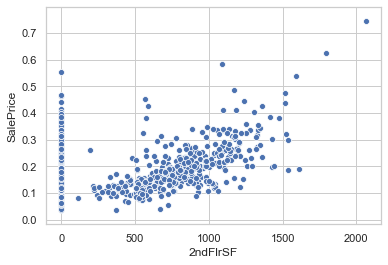

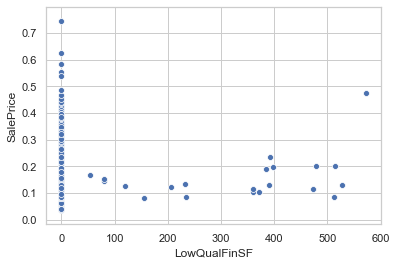

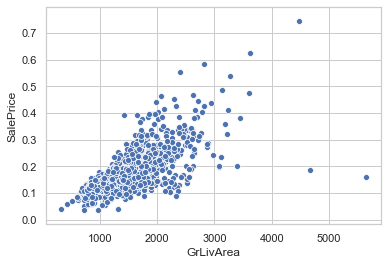

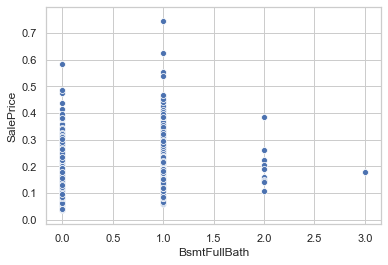

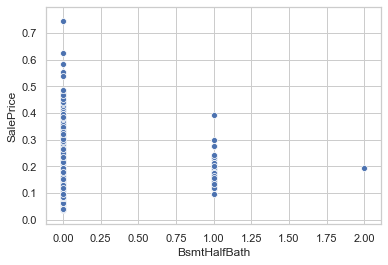

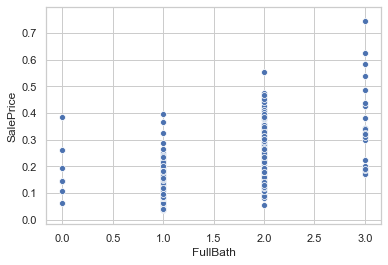

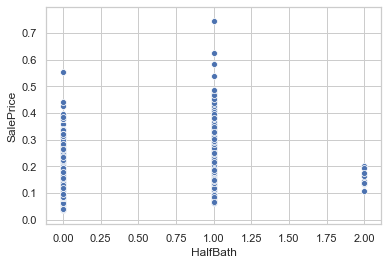

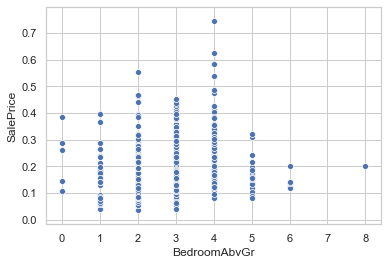

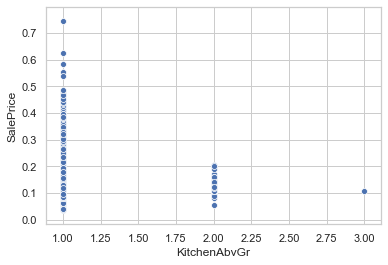

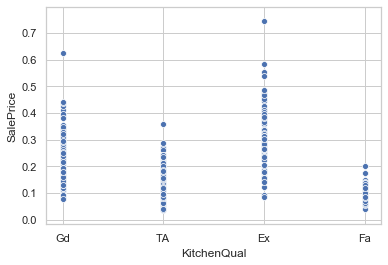

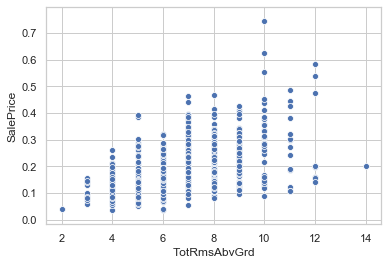

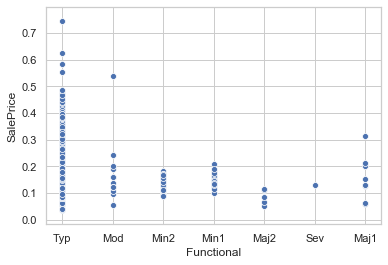

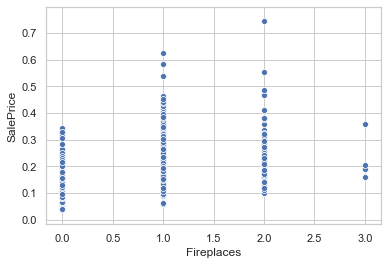

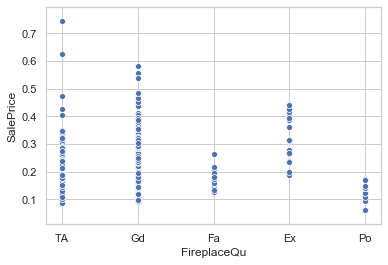

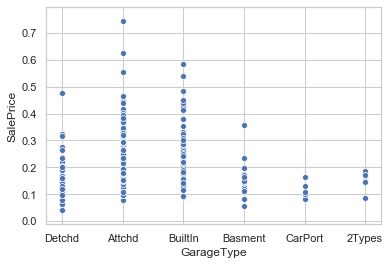

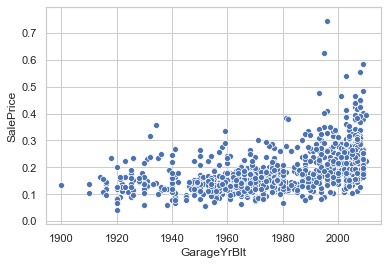

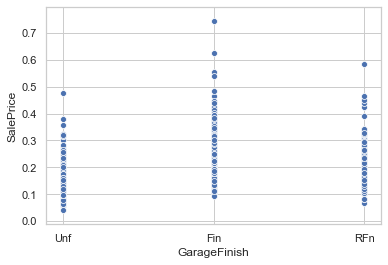

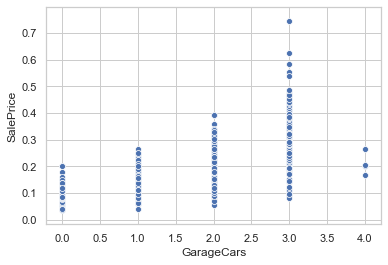

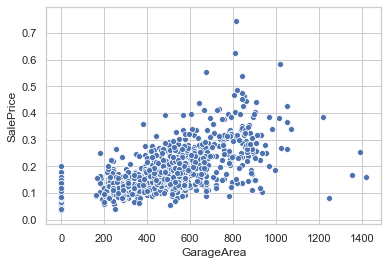

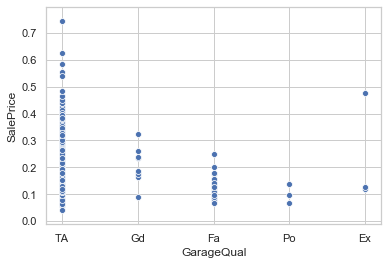

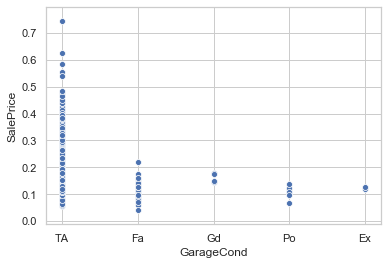

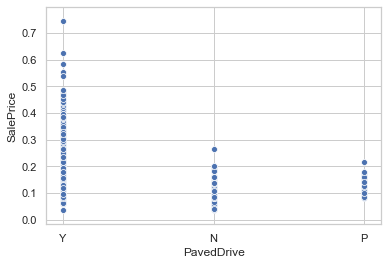

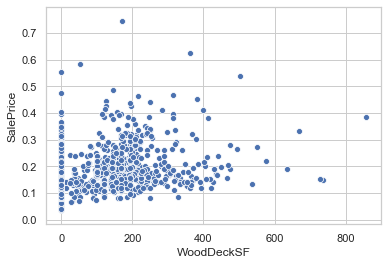

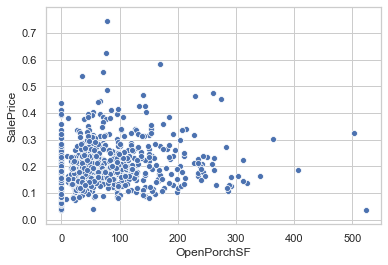

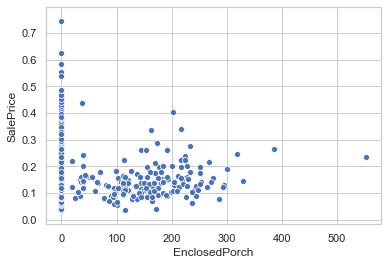

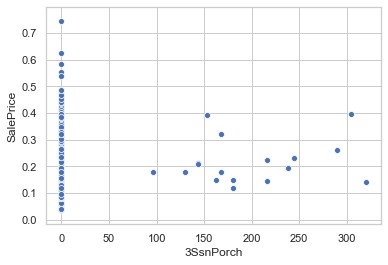

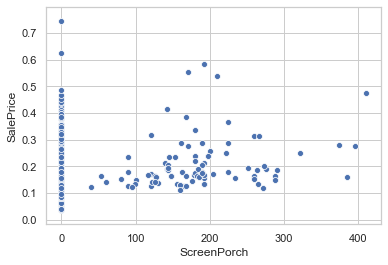

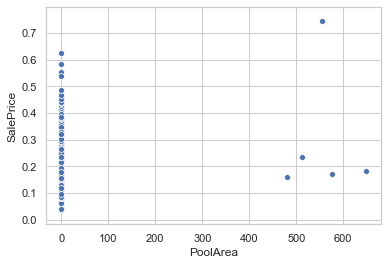

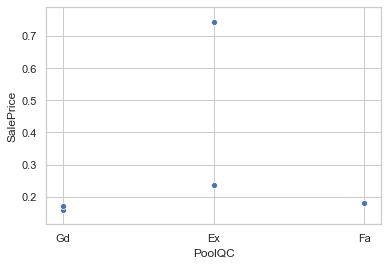

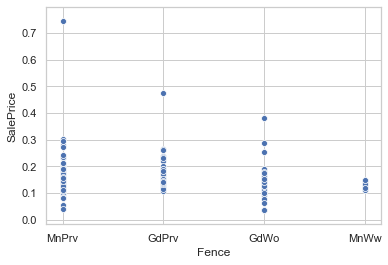

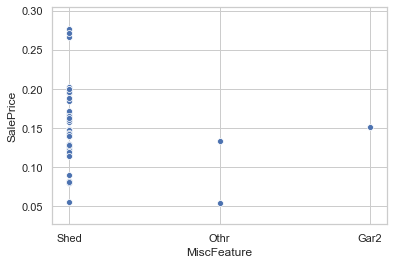

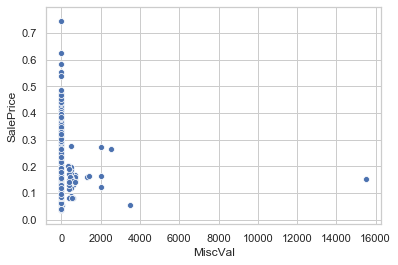

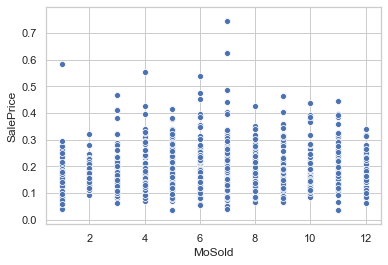

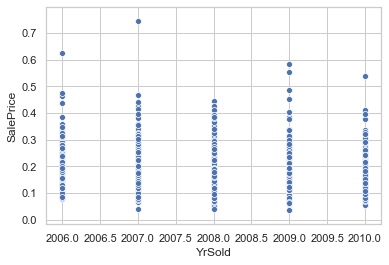

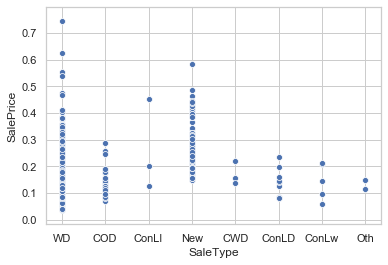

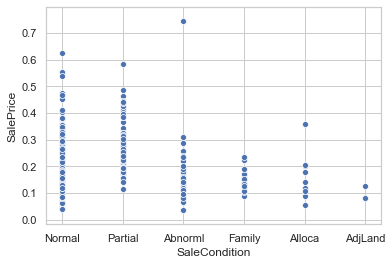

In [229]:
for i in list(X_df.columns):
    sns.scatterplot(x=X_df[i],y=Y_df,legend='full')
    plt.show()

In [94]:
def initialize(X,Y):
    w=np.random.randn(1,X.shape[0])*0.01
    b=np.zeros((1,X.shape[1]))
    m=X.shape[1]
    return w,b,m


In [157]:
#initial model without SGD

def linreg_without_SGD(X,Y,learning_rate=0.0005,num_iter=1000,printcost=True):
    w,b,m=initialize(X,Y)
    for i in range(num_iter):
        Y_hat=np.dot(w,X)+b
        diff=Y-Y_hat
        loss=0.5*np.mean(np.square(diff))
        if i%10000==0 and printcost:
            print('loss at iter %d is %f'%(i,loss))
        dw=-1.0/m*(np.dot(diff,X.T))
        db=-1.0/m*np.sum(diff)
        w=w-learning_rate*dw
        b=b-learning_rate*db
        #print('lol',Y_hat.max())
    return w,b,loss
        

In [238]:
#linear model with SGD

def linreg_SGD(X,Y,learning_rate=0.0005,batch_size=32,epochs=1000,printcost=True):
    w,b,m=initialize(X,Y)
    b=0.0
    for i in range(epochs+1):
        batch_start_index=0
        if batch_size<m:
            batch_end_index=batch_size
        else:
            batch_end_index=m
        while batch_end_index<=m:
            X_batch=X[:,batch_start_index:batch_end_index]
            Y_batch=Y[:,batch_start_index:batch_end_index]
            Y_hat=np.dot(w,X_batch)+b
            diff=Y_hat-Y_batch
            loss=0.5*np.mean(np.square(diff))
            #if batch_end_index==m: print(loss)
                
            dw=1.0/batch_size*(np.dot(diff,X_batch.T))
            db=1.0/batch_size*np.sum(diff)
            w=w-learning_rate*dw
            b=b-learning_rate*db
            if batch_end_index==m:
                break
            batch_start_index+=batch_size
            batch_end_index+=batch_size
            if batch_end_index>m:
                batch_end_index=m
        if i%1000==0 and printcost: print('cost on epoch ',i,' is ',loss)
    return w,b,loss

In [102]:
def evaluate(X,Y,w,b):
    pred=np.dot(w,X)+b.mean()
    mape=np.mean((np.absolute((Y-pred)/Y)))
    accuracy=100*(1-mape)
    return accuracy

In [268]:
w,b,loss=linreg_SGD(X_train,Y_train,batch_size=64,epochs=10000,learning_rate=0.0005)

cost on epoch  0  is  0.005146409240317058
cost on epoch  1000  is  0.0006790551883883233
cost on epoch  2000  is  0.0004825396506609245
cost on epoch  3000  is  0.0003927378229906649
cost on epoch  4000  is  0.0003483548699208258
cost on epoch  5000  is  0.0003239686744014341
cost on epoch  6000  is  0.00030909847915569895
cost on epoch  7000  is  0.0002991791489748137
cost on epoch  8000  is  0.00029209152966660167
cost on epoch  9000  is  0.0002867770222488086
cost on epoch  10000  is  0.000282662090909398


In [269]:
accuracy=evaluate(X_train,Y_train,w,b)
print("Train accuracy is %f percent" %(accuracy))

Train accuracy is 88.219122 percent


In [270]:
# Model Evaluation
Y_df=test['SalePrice']/1000000
X_df=test.drop(columns=['SalePrice'])
X_test=fix_data(X_df).values.T
Y_test=Y_df.values.reshape((1,X_test.shape[1]))

In [271]:
accuracy=evaluate(X_test,Y_test,w,b)
print("Test accuracy is %f percent" %(accuracy))

Test accuracy is 85.197892 percent


In [178]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge
from sklearn import metrics
regressor = Ridge()  
regressor.fit(X_train.T, Y_train.T)
Y_pred=regressor.predict(X_train.T)
train_accu=(1-metrics.mean_absolute_error(Y_train.T,Y_pred))*100
Ytest_pred=regressor.predict(X_test.T)
test_accu=(1-metrics.mean_absolute_error(Y_test.T,Ytest_pred))*100
print(f"Using sklearn model with regularization\ntrain accuracy is {train_accu}\ntest accuracy is {test_accu}" )

Using sklearn model with regularization
train accuracy is 97.30902266385343
test accuracy is 96.49850483015841


In [47]:
Ridge?

In [72]:
w.shape

(1, 79)

In [77]:
b.shape

(1, 1138)